# Data Preprocessing Visualization
Dataset:
House Price (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats


%matplotlib inline

# 1. 导入数据集


In [2]:
# import train.csv
dataset = pd.read_csv("data/train.csv")
print(f'Dataset size: {dataset.shape}')
print(f'{"Column Name":<16}Data Type')
dataset.info()

# Id is useless, so remove it
# Id 在数据集中只用来辨识数据行, 所以可以刪去
dataset = dataset.drop('Id',axis=1)
print(f'After Delete, Dataset size: {dataset.shape}')



Dataset size: (1460, 81)
Column Name     Data Type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  O

#  2. 原始数据可视化

## 2.1 目标变量分布

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


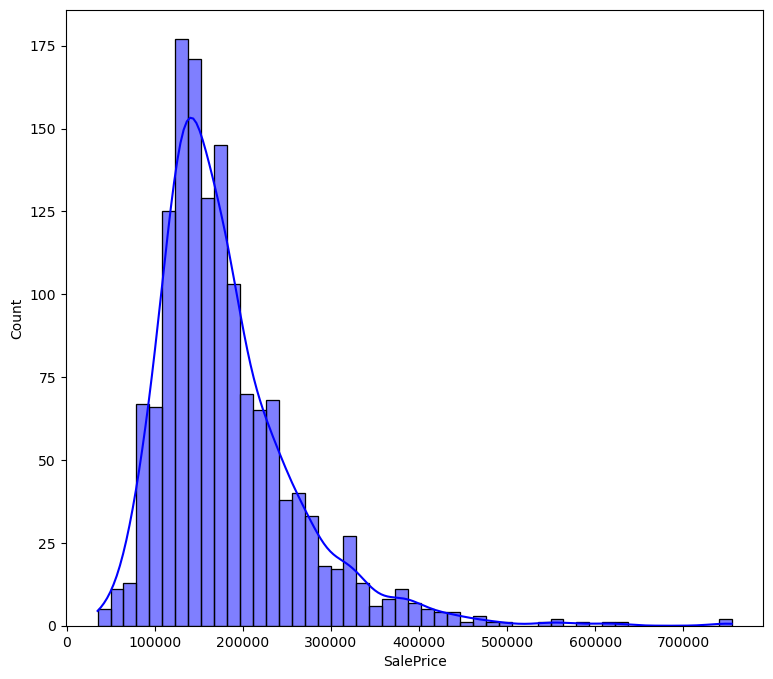

In [3]:
print(dataset['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(dataset['SalePrice'], color='b', kde=True);

## 2.2 其他变量分布

In [4]:
# 记录数值类型的 column
numberColumn = list()
for name, dtype in dataset.dtypes.iteritems():
    if dtype != object:
        numberColumn.append(name)
# 最后一项的 salePrice 已经画过故去除
numberColumn.pop()
#print(numberColumn)
numberDataset = dataset[numberColumn].copy()
numberDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

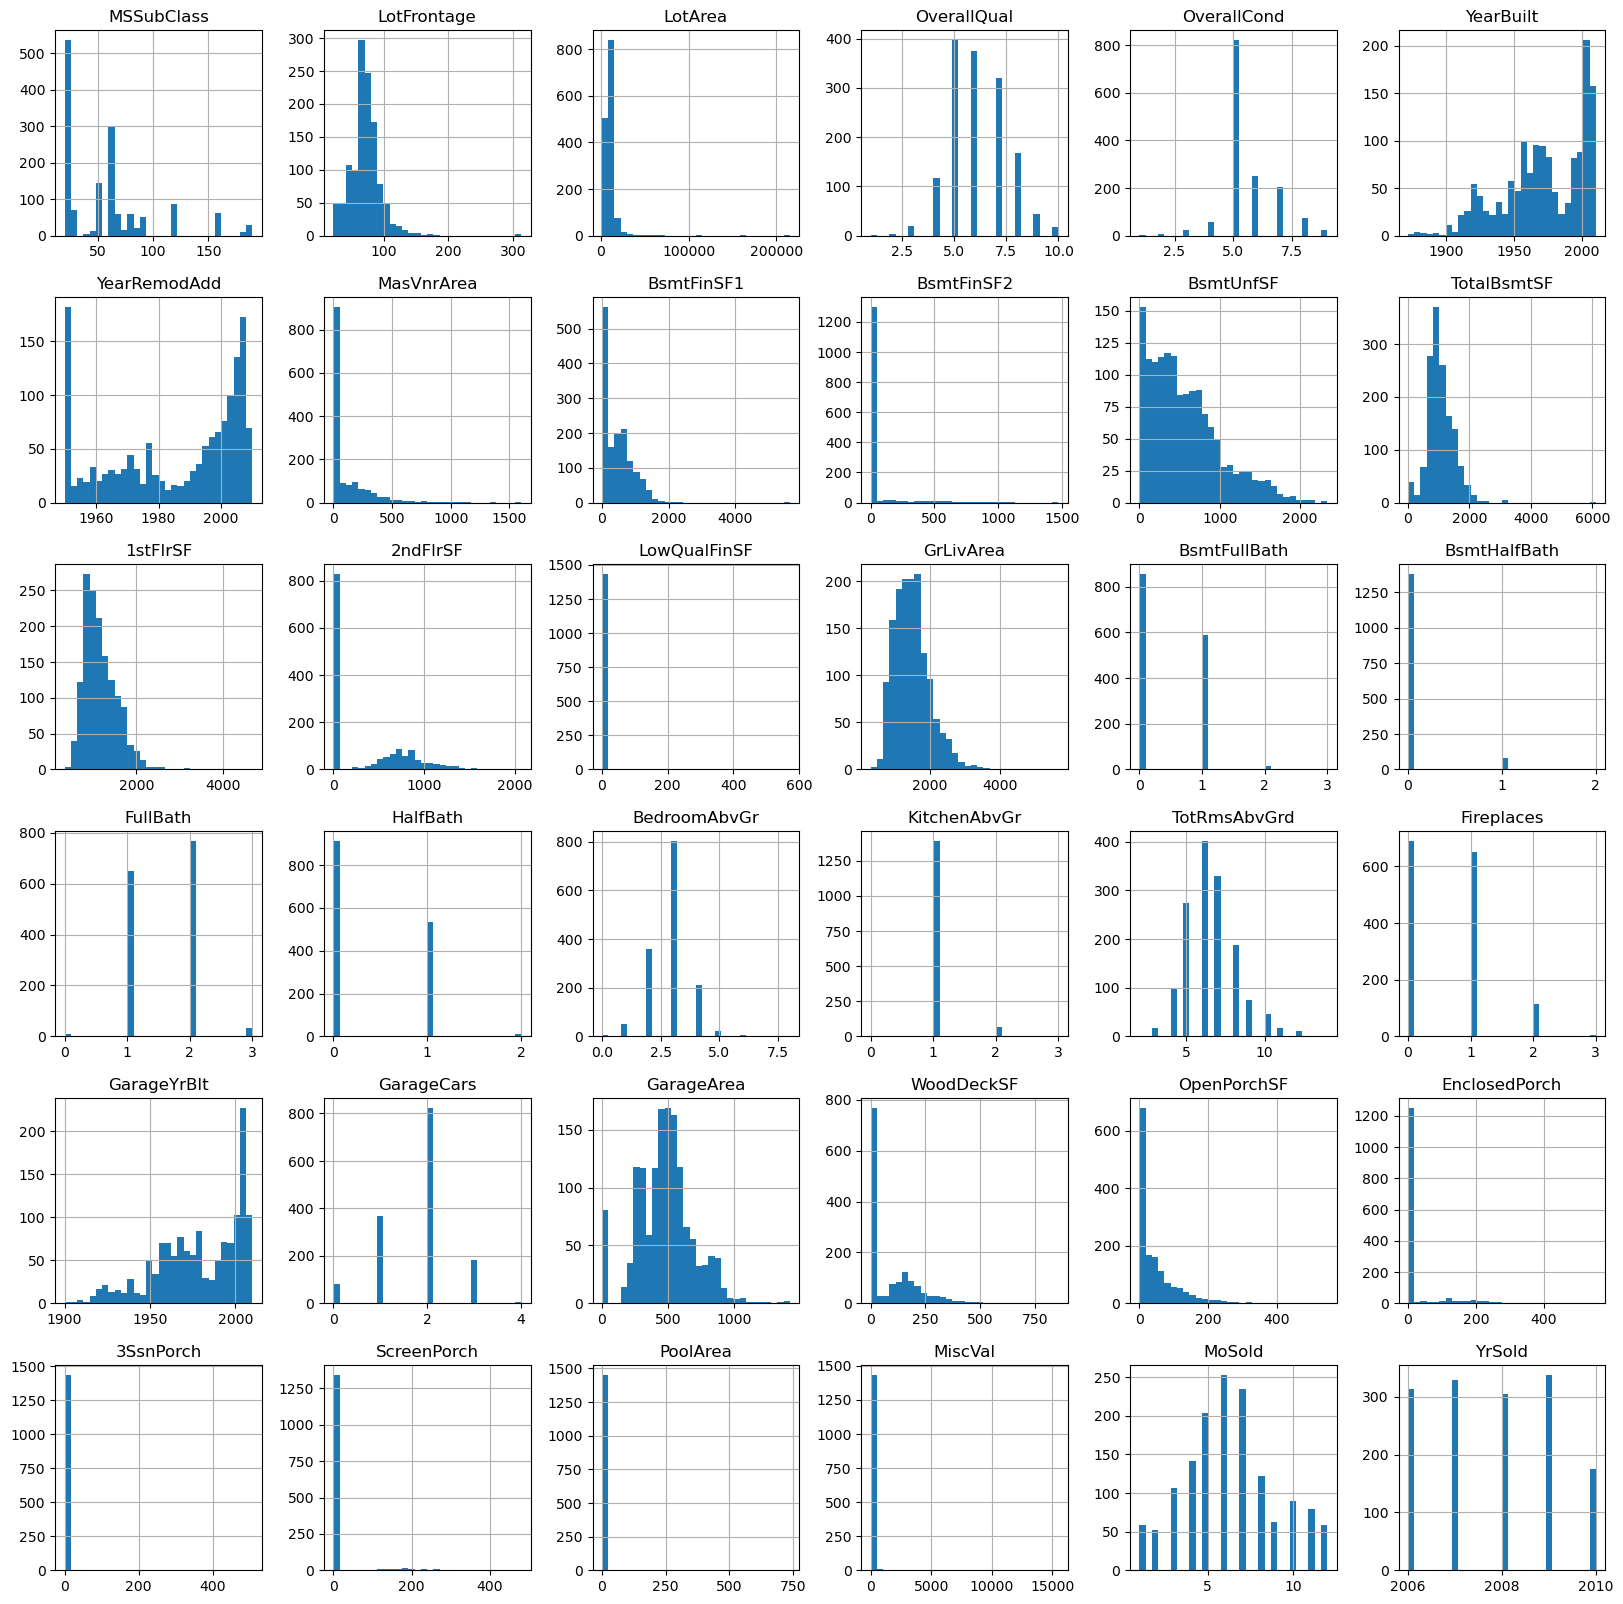

In [5]:
numberDataset.hist(figsize=(20, 20), bins=30);


# 3. 填补缺失数据
通过对数据集進行观察, 并对其缺失值进行处理

## 3.1 使用0填充

由于一些数据 NA 是因为没有该项目, 所以可以直接使用 0 去填充
因为一些房屋没有车库, 所以以下数据的 NA 值, 可以用 0 代替
* GarageCars, Size of garage in car capacity
* GarageArea, Size of garage in square feet

因为一些房屋没有地库, 所以以下数据的 NA 值, 可以用 0 代替
* BsmtFinSF1, Type 1 finished square feet
* BsmtFinSF2, Type 2 finished square feet
* BsmtUnfSF, Unfinished square feet of basement area
* TotalBsmtSF, Total square feet of basement area
* BsmtFullBath, Basement full bathrooms
* BsmtHalfBath, Basement half bathrooms

因为一些房屋没有贴砖墙(Masonry veneer area) 所以 NA 值可以使用 0 代替
* MasVnrArea, Masonry veneer area in square feet



In [6]:
# use 0 to fill NA in following Variable
dataset['MasVnrArea']=dataset['MasVnrArea'].fillna(0)

dataset['BsmtHalfBath']=dataset['BsmtHalfBath'].fillna(0)
dataset['BsmtFullBath']=dataset['BsmtFullBath'].fillna(0)
dataset['TotalBsmtSF']=dataset['TotalBsmtSF'].fillna(0)
dataset['BsmtUnfSF']=dataset['BsmtUnfSF'].fillna(0)
dataset['BsmtFinSF2']=dataset['BsmtFinSF2'].fillna(0)
dataset['BsmtFinSF1']=dataset['BsmtFinSF1'].fillna(0)

dataset['GarageArea']=dataset['GarageArea'].fillna(0)
dataset['GarageCars']=dataset['GarageCars'].fillna(0)
#dataset.info()

## 3.2 使用中位数填充
有一些数据是比较特殊的, 比如年份, 使用 0 去填充会影响整体结果, 所以采用中位数去填充, 用以避免使用 0 破坏了原本数据的分布
因为一些房屋没有车库, 所以 GarageYrBlt, 用整组数据的中位数代替
* GarageYrBlt, Year garage was built

In [7]:
### Use median to fill NA in following Variable
dataset['GarageYrBlt']=dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].median())
#dataset.info()

## 3.3 使用相似数据填充
LotFrontage, Linear feet of street connected to property 是指房屋与街道的距離, 因此, 我们采用相同地区邻区的中位数去代替, 既补充了该房屋的数据, 又不会对数据集有太大影响


In [8]:
### Use neighbors to fill
# 按地区分组计算该地区的中位数, 并转化成字典方便之后获取数据
LotFrontageMedians = dataset.groupby('Neighborhood')['LotFrontage'].median().to_dict()
#print((LotFrontageMedians))
# 复制本身 LotFrontage Column 
newLotFrontage = dataset['LotFrontage']
for i in range(0,len(dataset)):
    # 寻找 NA
    if pd.isna(dataset['LotFrontage'][i]):
        #print(i)
        #print(dataset['Neighborhood'][i])
        #print(newLotFrontage[i])
        # 把 NA 改为该房屋所在地区的中位数
        newLotFrontage[i] = LotFrontageMedians[dataset['Neighborhood'][i]]
        #print(newLotFrontage[i])
        #break
#print(newLotFrontage)
# 把修改后的 Column 取代 dataset 原本的 Column
dataset['LotFrontage']=newLotFrontage
print(dataset['LotFrontage'].info())


<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
None


C:\Users\Kit\AppData\Local\Temp\ipykernel_800\582397799.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newLotFrontage[i] = LotFrontageMedians[dataset['Neighborhood'][i]]


## 3.4 根据数值定义填充
还有一些数据本身是字符类型, 所以我们根据该栏位的实际含义去填充相应的数据

因为以下栏位NA代表没有该项目, 所以我们以 None 去填充
* Alley, Type of alley access to property, NA 表示没有胡同(Alley), 所以使用 None 代替
* PoolQC, Pool quality, NA 表示没有泳池(Pool), 所以使用 None 代替
* Fence, Fence quality, NA 表示没有栅栏(Fence), 所以使用 None 代替
* MiscFeature, Miscellaneous feature not covered in other categories, NA 表示没有其他杂项, 所以使用 None 代替
* FireplaceQu, Fireplace quality,  NA 表示没有壁炉(Fireplace), 所以使用 None 代替
* MasVnrType, Masonry veneer type, 因为一些房屋没有贴砖墙(Masonry veneer area) 所以 NA 值可以使用 None 代替

因为有一些房屋没有车库, 所以以下数据的 NA 值, 可以用 None 代替
* GarageType, Garage location
* GarageFinish, Interior finish of the garage
* GarageQual, Garage quality
* GarageCond, Garage condition

因为有一些房屋没有地库, 所以以下数据的 NA 值, 可以用 None 代替
* BsmtQual, Evaluates the height of the basement
* BsmtCond, Evaluates the general condition of the basement
* BsmtExposure, Refers to walkout or garden level walls
* BsmtFinType1, Rating of basement finished area
* BsmtFinType2, Rating of basement finished area (if multiple types)


In [9]:
dataset['Alley'] = dataset['Alley'].fillna("None")
dataset['PoolQC'] = dataset['PoolQC'].fillna("None")
dataset['Fence'] = dataset['Fence'].fillna("None")
dataset['MiscFeature'] = dataset['MiscFeature'].fillna("None")
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna("None")
dataset['MasVnrType'] = dataset['MasVnrType'].fillna("None")

dataset['GarageType'] = dataset['GarageType'].fillna("None")
dataset['GarageFinish'] = dataset['GarageFinish'].fillna("None")
dataset['GarageQual'] = dataset['GarageQual'].fillna("None")
dataset['GarageCond'] = dataset['GarageCond'].fillna("None")

dataset['BsmtQual'] = dataset['BsmtQual'].fillna("None")
dataset['BsmtCond'] = dataset['BsmtCond'].fillna("None")
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna("None")
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].fillna("None")
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna("None")

#print(dataset.info())

## 3.5 使用众数填充
Electrical 栏位缺少了一项, 以 NA 又没有定义, 可以判断为数据有错漏, 所以使用出现最多的情況去填充有关数据, 使其不会破坏数据分布
* Electrical, Electrical system

In [10]:
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

#  4. 移除异常项及可视化

## 4.1 面积与售价
一般而言, 面积越大, 售价越高, 故我们使用面积与售价进行散点图观察
### 4.1.1 地上面积

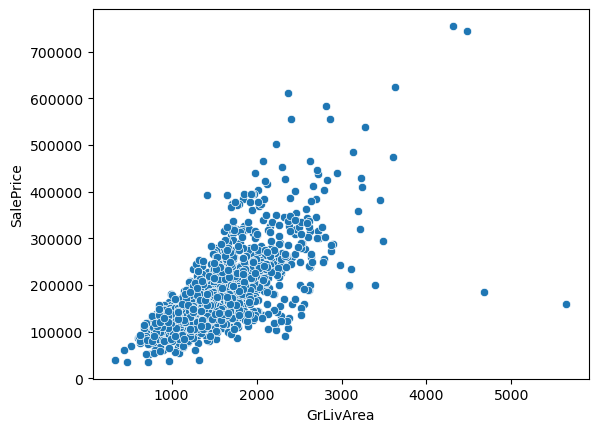

In [11]:
sns.scatterplot(data=dataset, x='GrLivArea', y='SalePrice');

可以明显看出有2个面积最大的房屋, 售价却很低, 所以我们去除掉这2个项目

In [12]:
dataset = dataset.drop(dataset[(dataset['GrLivArea']>4500) & (dataset['SalePrice']<190000)].index)

### 4.1.2 地库面积

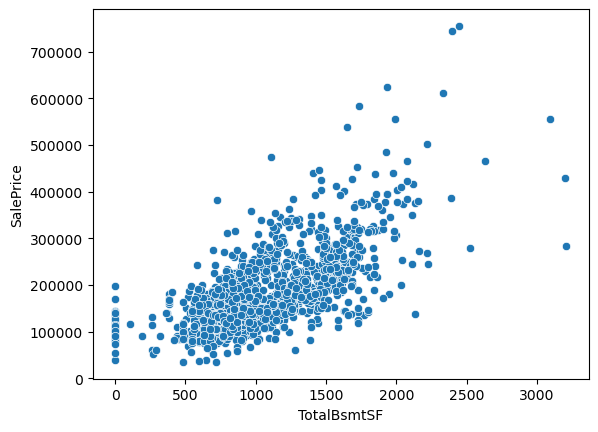

In [13]:
sns.scatterplot(data=dataset, x='TotalBsmtSF', y='SalePrice');

可以从上图看到地库面积中並没有偏離现实售价的房屋

## 4.2 房屋评价

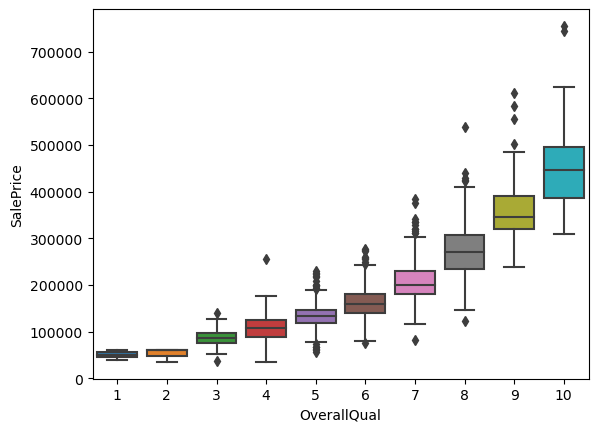

In [14]:
sns.boxplot(data=dataset, x='OverallQual', y='SalePrice');

可以看出, 除了少数房屋外, 大多数房屋的售价与其评价呈正相关, 有些房屋可能因为地段/面积等问题导致评分一致, 但售价最高与最低差距出现较大

## 4.3 房屋年份

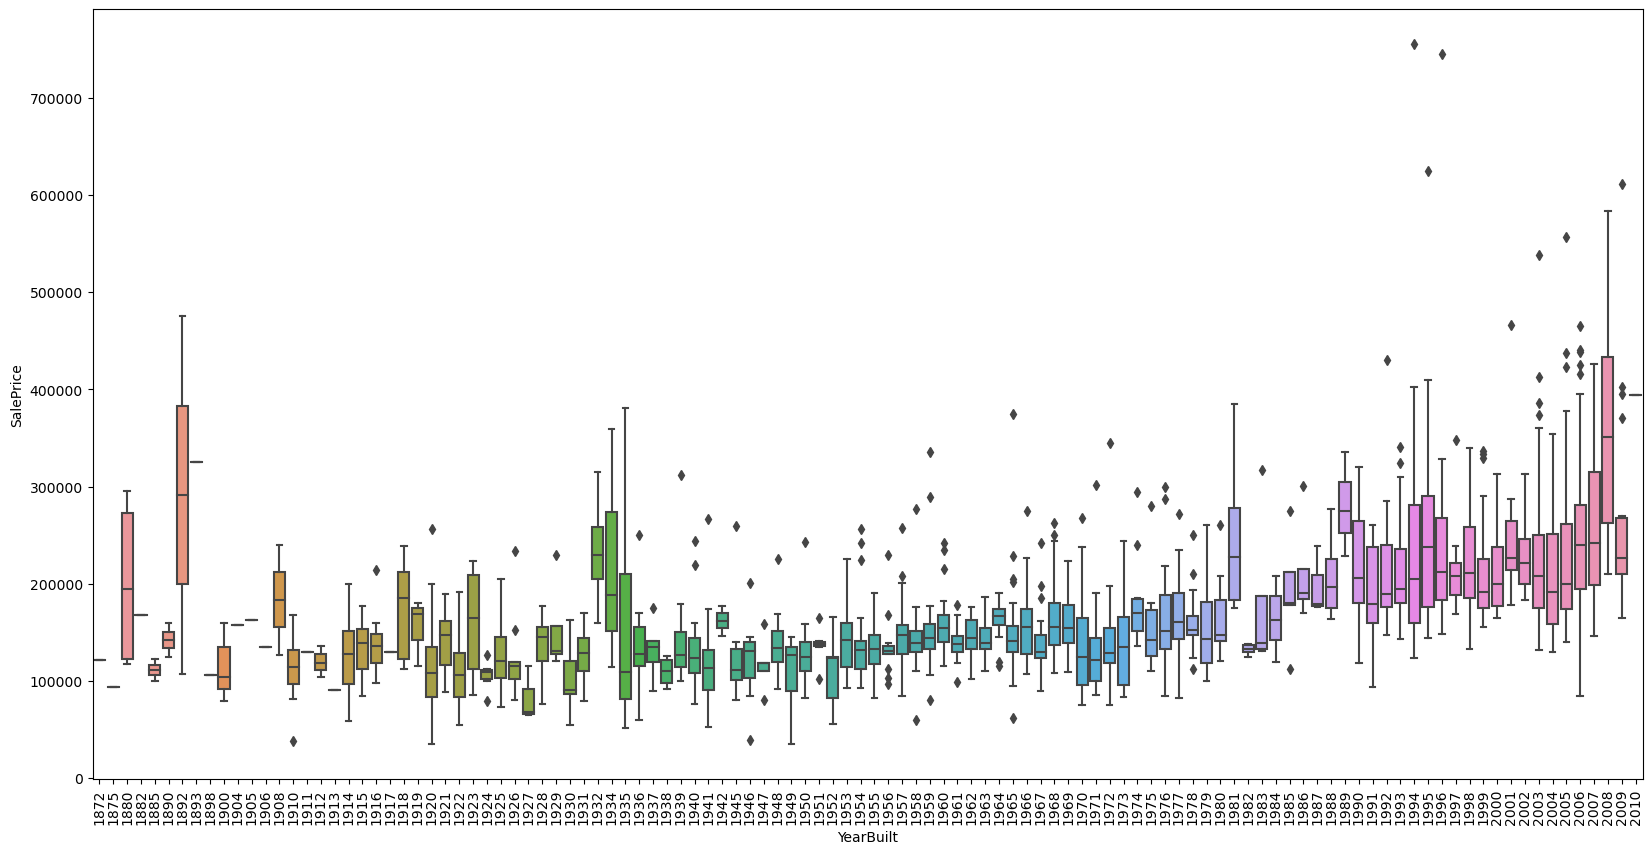

In [15]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data=dataset, x='YearBuilt', y='SalePrice');

能夠看到房屋的年份与售价的相关性不太高, 老旧的及最新的都比较贵, 但也可能因为其他原因导致

## 4.4  数据分布直方图
经过数据清洗后, 每个栏位的直方图如下

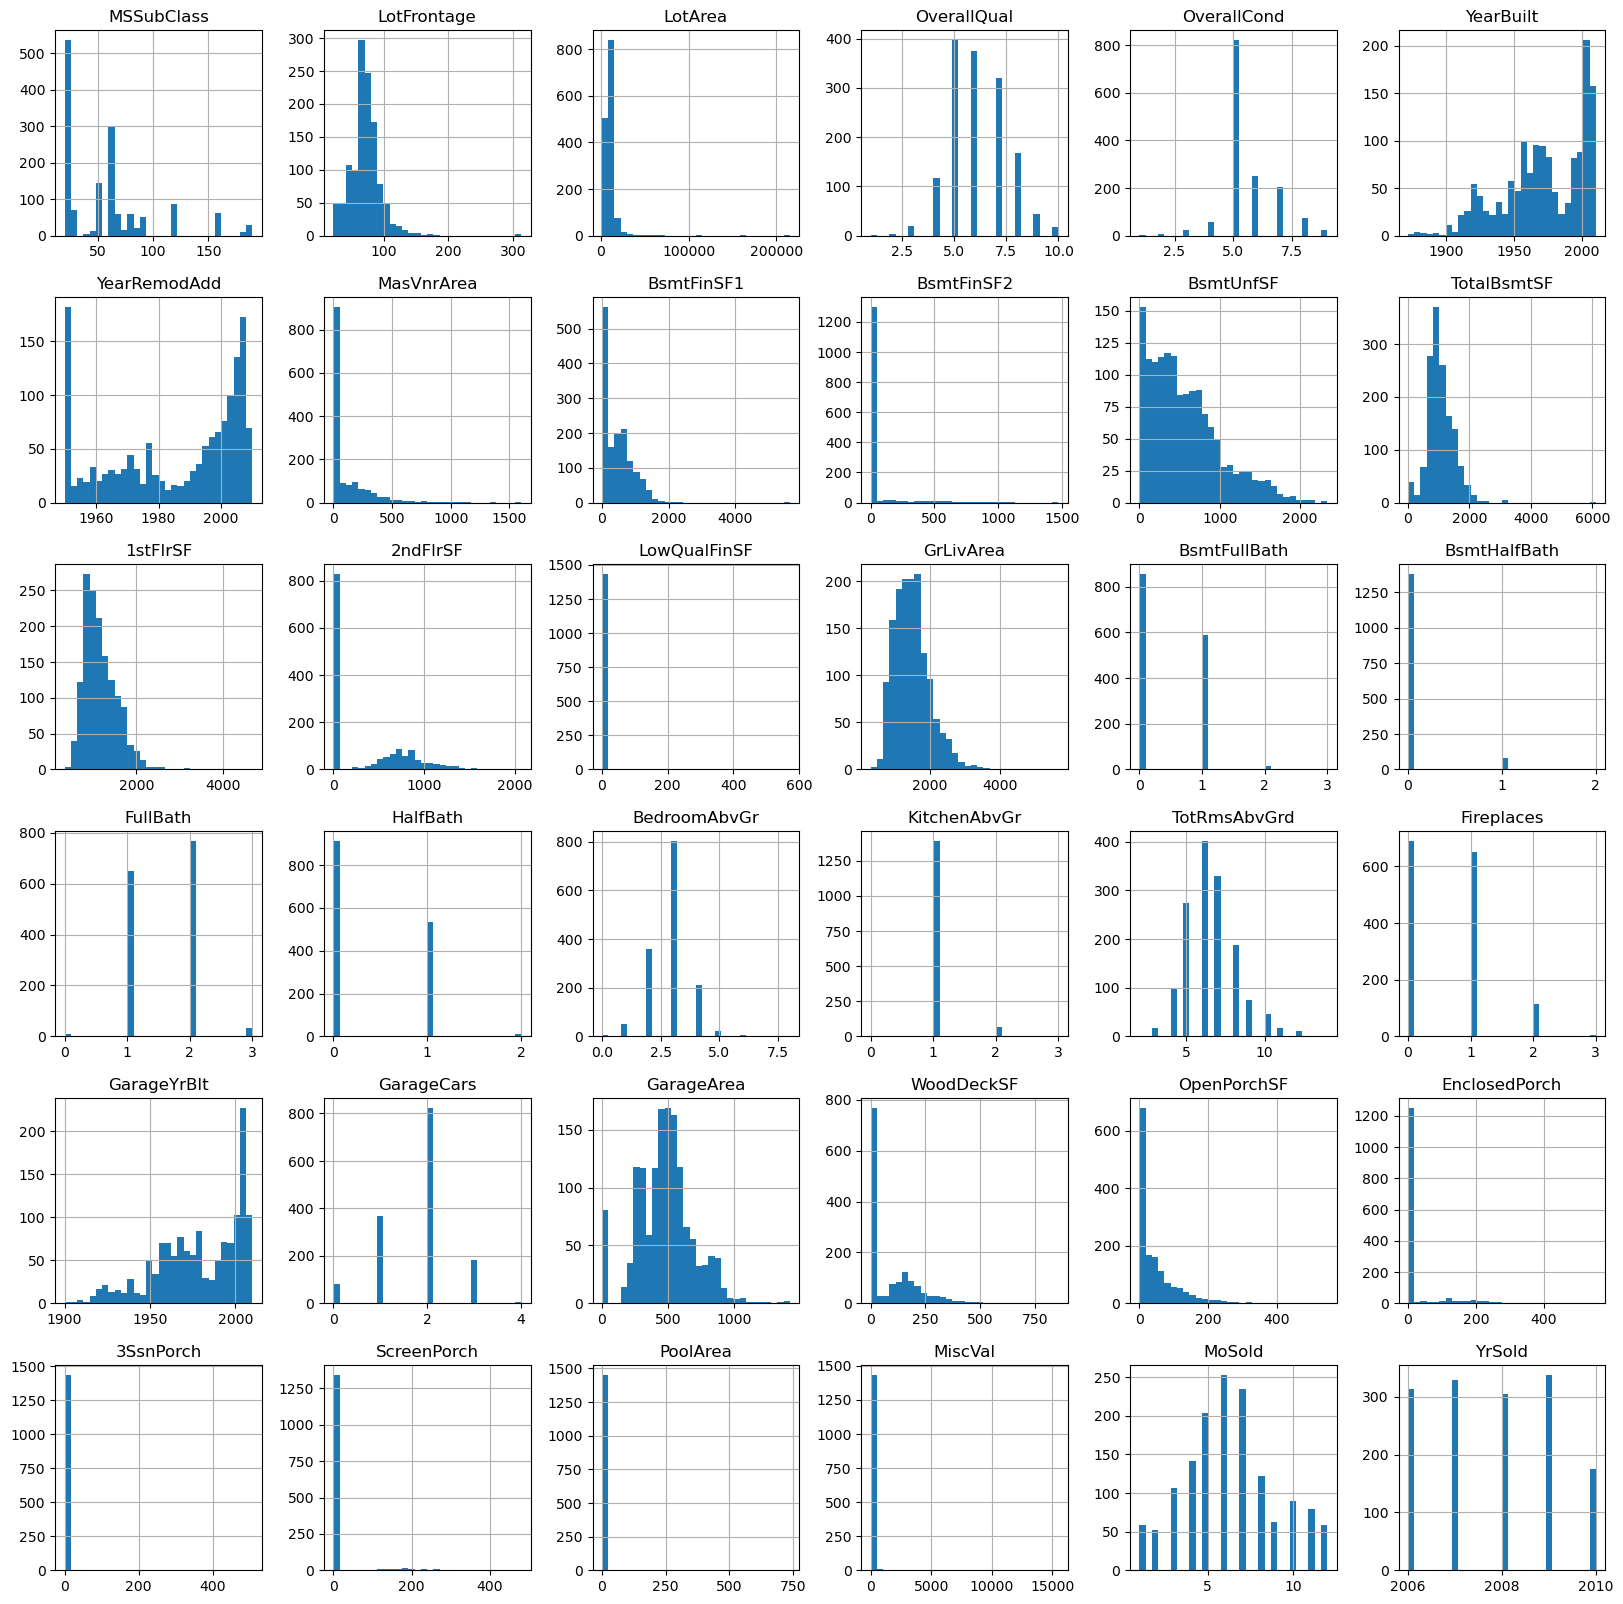

In [16]:
newNumberDataset = dataset[numberColumn].copy()
numberDataset.hist(figsize=(20, 20), bins=30);

## 4.5 QQ图


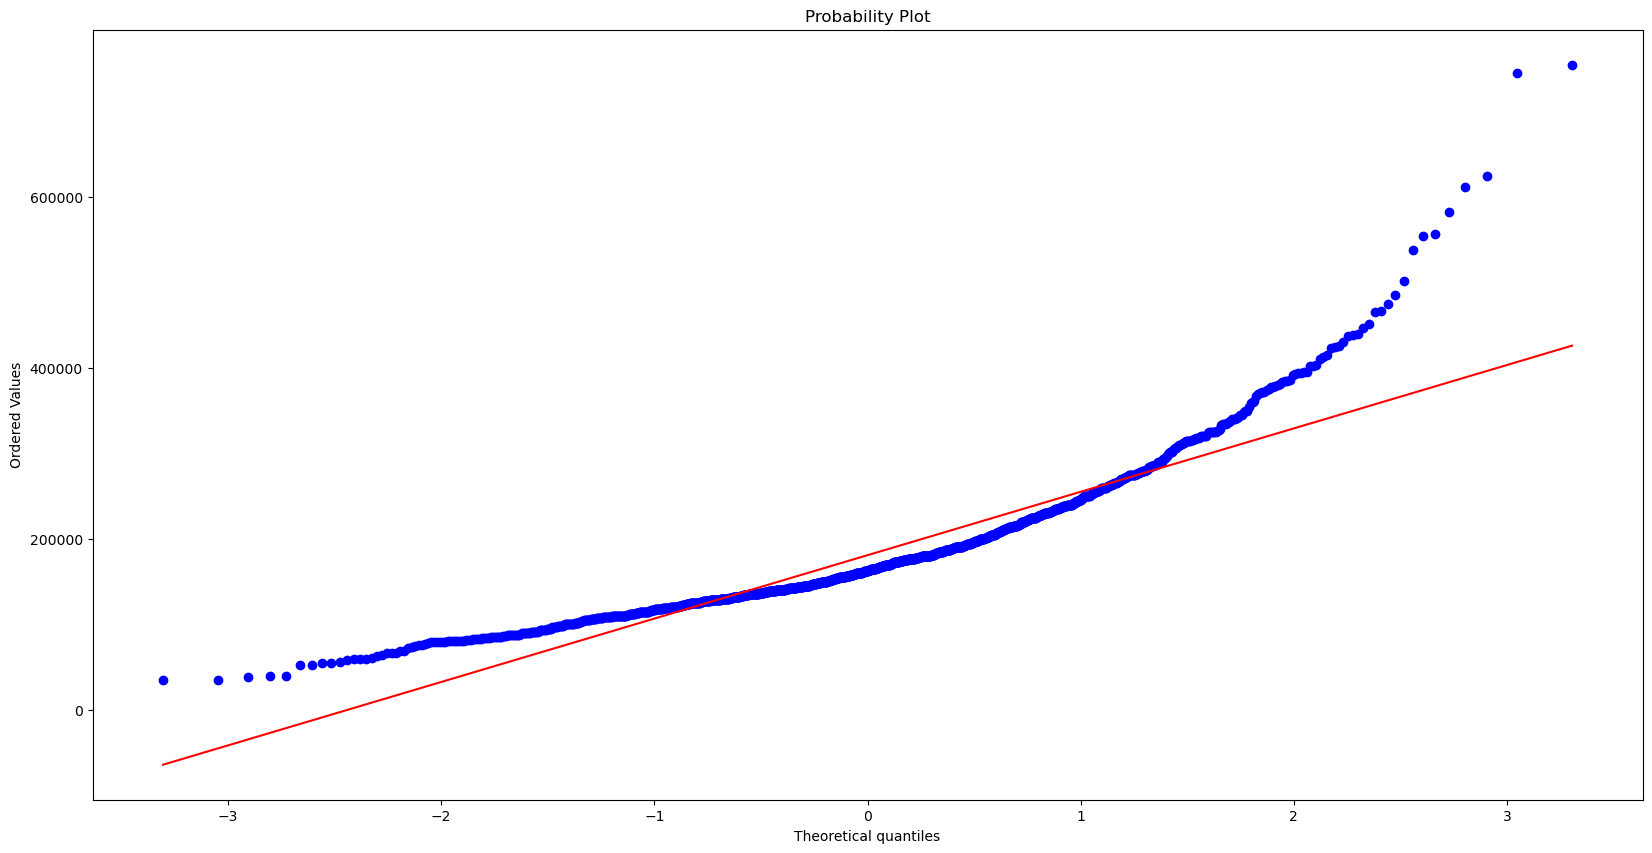

In [17]:
plt.figure(figsize=(20,10))
stats.probplot(dataset['SalePrice'], plot=plt);

从 QQ 图中可以看出SalePrice 并不是标准正态分布, 呈现了偏态分布
我们对其进行对数变換, 希望能夠变回正态分布

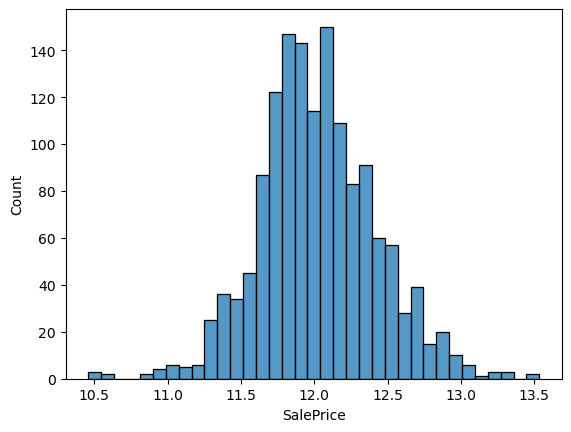

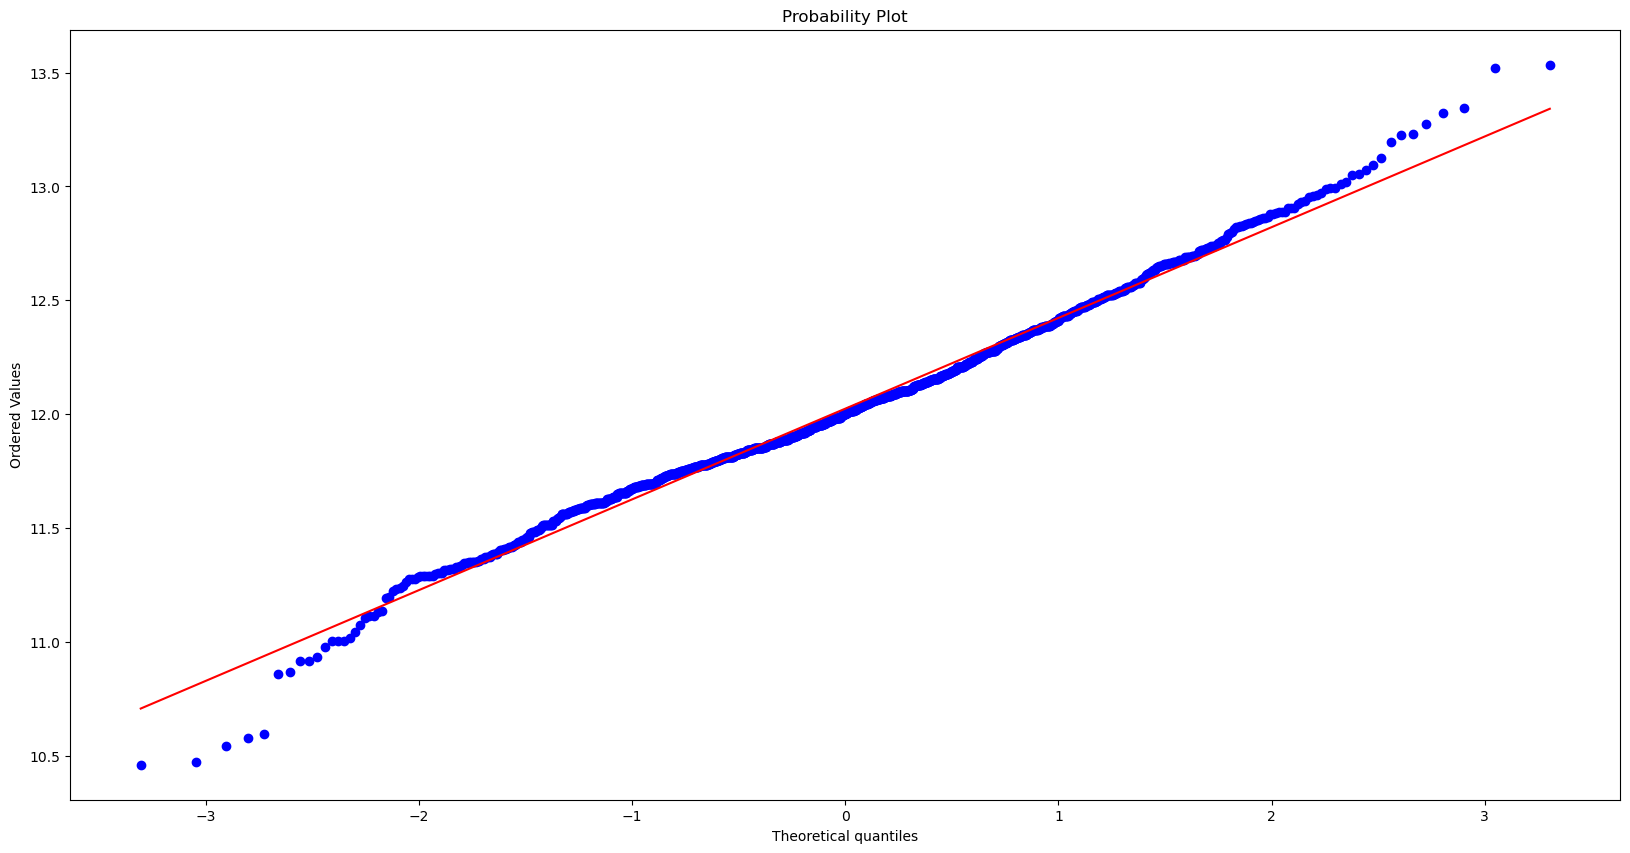

In [18]:
# 复制数据集以避免对其他图表产生影响
newDataset = dataset
# 对数变换
newDataset['SalePrice'] = np.log1p(newDataset['SalePrice'])

# 绘制新分布图
sns.histplot(newDataset['SalePrice']);

# 绘制新 QQ 图
plt.figure(figsize=(20,10))
stats.probplot(newDataset['SalePrice'], plot=plt);

可以看出经过数据预处理及对数变換后, 售价较为符合正态分布, 后续要进行数据预测时, 应该采用处理后的数据
## 4.6 GarageYrBlt 数据处理前后比较

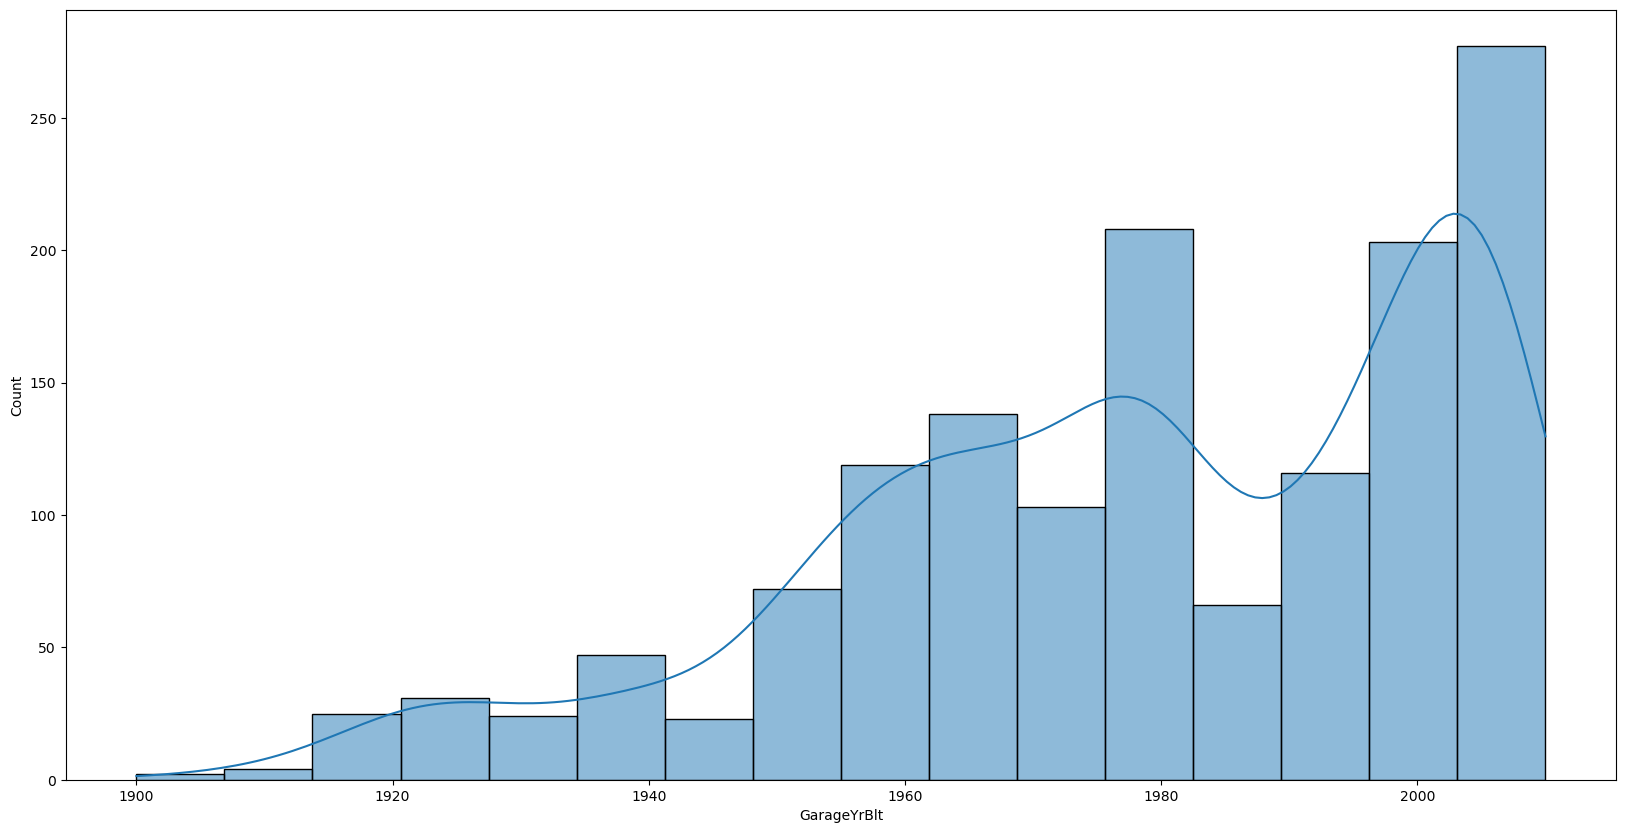

In [28]:
#原始数据
originalDataset = pd.read_csv("data/train.csv")

plt.figure(figsize=(20,10))
sns.histplot(dataset['GarageYrBlt'], kde=True);
#处理后数据直线图

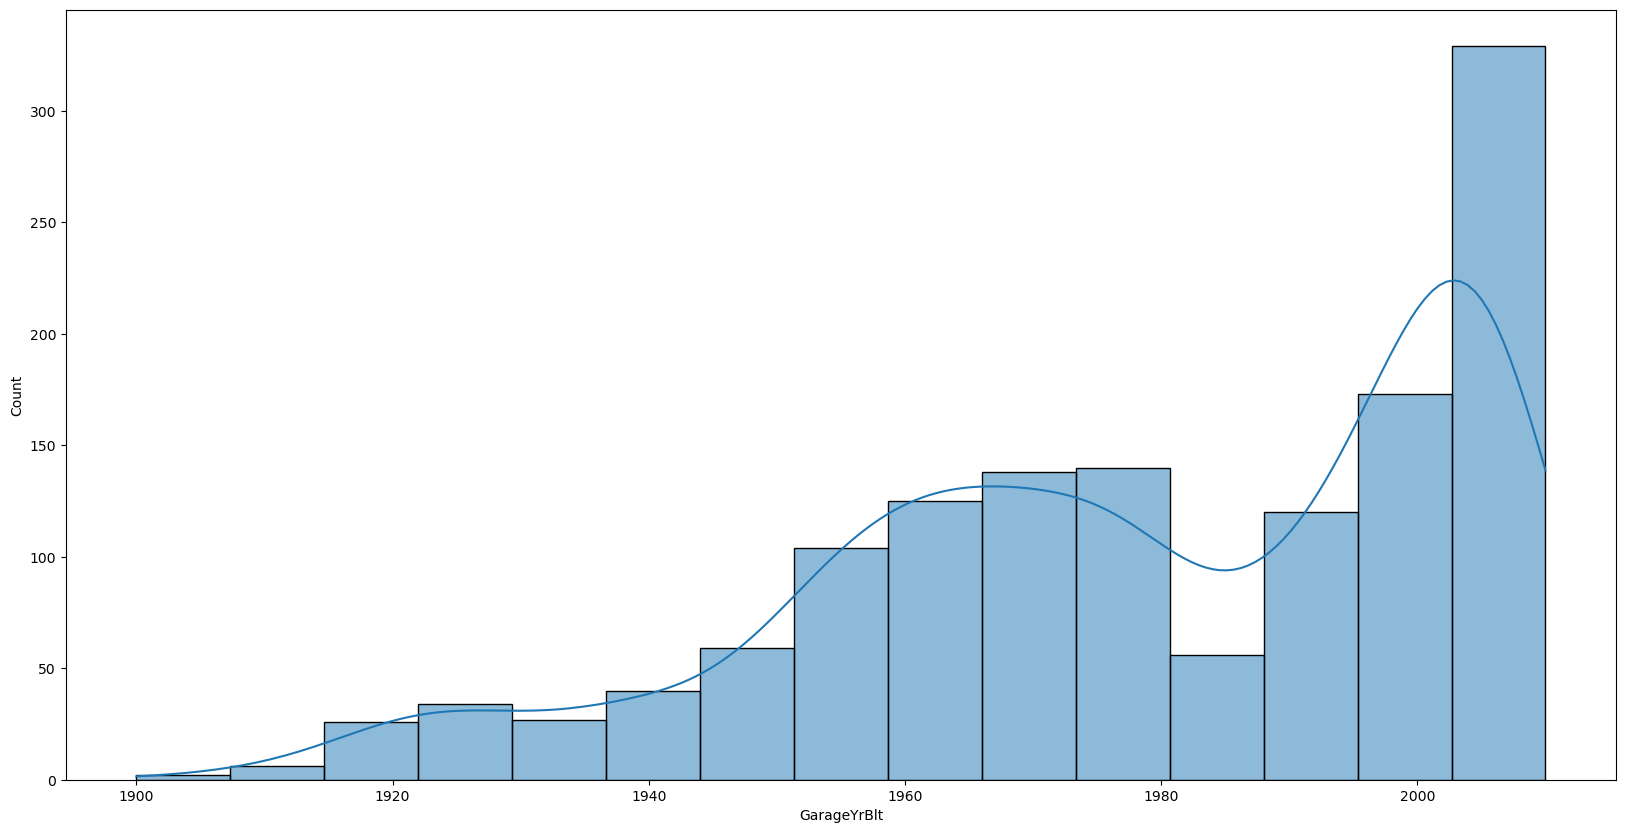

In [25]:
plt.figure(figsize=(20,10))
sns.histplot(originalDataset['GarageYrBlt'],kde=True);
#未处理数据直线图

可以看到我们使用中位数处理 GarageYrBlt 数据后, 对数据总体分布有一定影响
## 4.7 LotFrontage 数据处理前后比较

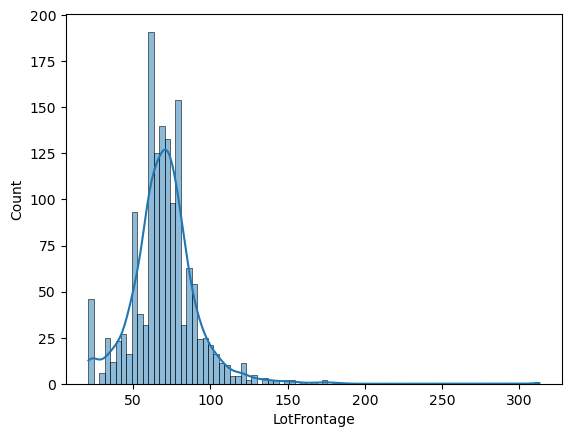

In [34]:
sns.histplot(dataset['LotFrontage'], kde=True);
#处理后数据直线图

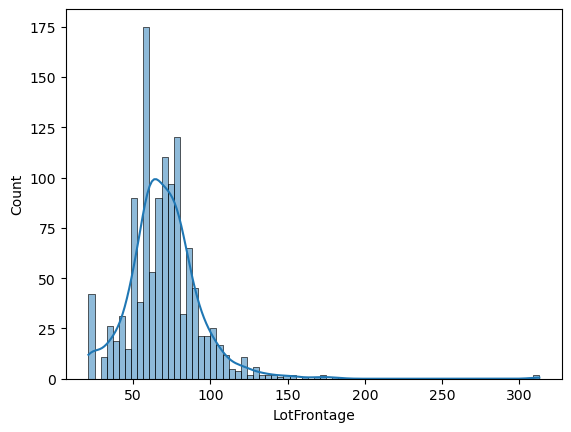

In [33]:
sns.histplot(originalDataset['LotFrontage'],kde=True);
#未处理数据直线图

可以看出使用相似项的数据去做填充时, 对整体的数据分布没有影响.
## 4.8 MasVnrArea 数据处理前后比较

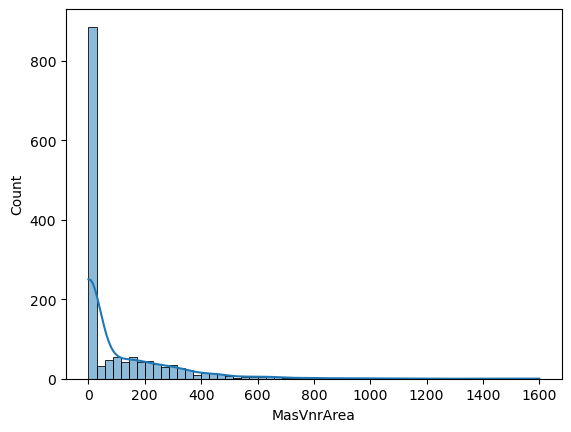

In [35]:
sns.histplot(dataset['MasVnrArea'], kde=True);
#处理后数据直线图

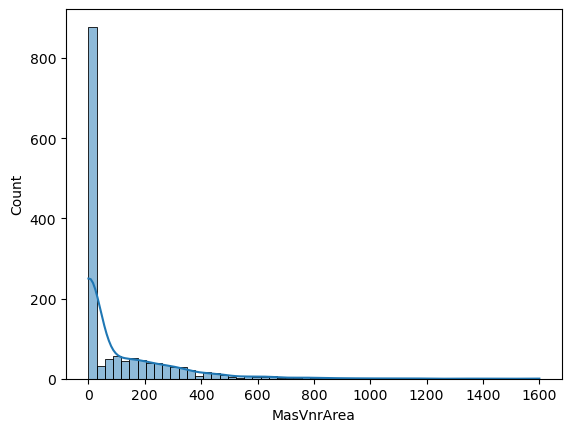

In [36]:
sns.histplot(originalDataset['MasVnrArea'],kde=True);
#未处理数据直线图

从上述两幅图可以看出使用0填充, 数据分布是一样的, 这是由于图表在绘制时, 把NA值当0去处理。故使用0填充数据在计算中是与没有处理是一样的, 但对于实际意义需要我们判断是否符合, 並不能一昧地用0去填充数据。